In [58]:
import torch

In [59]:
import torch.nn as nn
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [60]:
n_pts = 500
X, y = datasets.make_circles(n_samples = n_pts, random_state=123, noise = 0.1, factor=0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500, 1))

In [61]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])

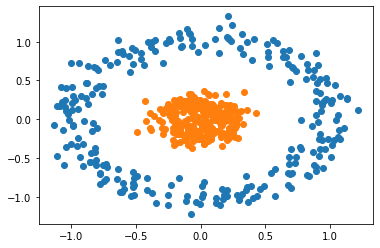

In [62]:
scatter_plot()

In [63]:
class Model(nn.Module):
    def __init__(self, input_size, H1, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)
    
    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        x = torch.sigmoid(self.linear2(x))
        return x
    
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0
                

In [64]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))


[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [65]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)


In [66]:
epochs = 1000
losses = []

for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print('epoch:', i, "loss", loss.item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

epoch: 0 loss 0.7148522138595581
epoch: 1 loss 0.6947318911552429
epoch: 2 loss 0.6955163478851318
epoch: 3 loss 0.7014891505241394
epoch: 4 loss 0.7013983130455017
epoch: 5 loss 0.6974702477455139
epoch: 6 loss 0.693925678730011
epoch: 7 loss 0.6928598284721375
epoch: 8 loss 0.6939383149147034
epoch: 9 loss 0.6954388618469238
epoch: 10 loss 0.6958754062652588
epoch: 11 loss 0.6949177980422974
epoch: 12 loss 0.6931490302085876
epoch: 13 loss 0.6913898587226868
epoch: 14 loss 0.6901612877845764
epoch: 15 loss 0.6894590854644775
epoch: 16 loss 0.6888433694839478
epoch: 17 loss 0.6877668499946594
epoch: 18 loss 0.6859008073806763
epoch: 19 loss 0.6832481622695923
epoch: 20 loss 0.6800421476364136
epoch: 21 loss 0.6765590310096741
epoch: 22 loss 0.6729680895805359
epoch: 23 loss 0.6692698001861572
epoch: 24 loss 0.6653285622596741
epoch: 25 loss 0.6609664559364319
epoch: 26 loss 0.6560585498809814
epoch: 27 loss 0.6505836248397827
epoch: 28 loss 0.6446025371551514
epoch: 29 loss 0.63819819

epoch: 376 loss 0.006898720748722553
epoch: 377 loss 0.006871812045574188
epoch: 378 loss 0.006845066323876381
epoch: 379 loss 0.00681848730891943
epoch: 380 loss 0.006792063824832439
epoch: 381 loss 0.006765800528228283
epoch: 382 loss 0.006739698350429535
epoch: 383 loss 0.006713752634823322
epoch: 384 loss 0.006687963381409645
epoch: 385 loss 0.006662325467914343
epoch: 386 loss 0.0066368416883051395
epoch: 387 loss 0.006611511576920748
epoch: 388 loss 0.0065863304771482944
epoch: 389 loss 0.006561300717294216
epoch: 390 loss 0.0065364227630198
epoch: 391 loss 0.0065116845071315765
epoch: 392 loss 0.006487096659839153
epoch: 393 loss 0.006462655961513519
epoch: 394 loss 0.00643835449591279
epoch: 395 loss 0.006414196919649839
epoch: 396 loss 0.006390180438756943
epoch: 397 loss 0.006366305984556675
epoch: 398 loss 0.006342571694403887
epoch: 399 loss 0.006318972911685705
epoch: 400 loss 0.006295512430369854
epoch: 401 loss 0.0062721907161176205
epoch: 402 loss 0.006249005440622568
e

epoch: 768 loss 0.002380864694714546
epoch: 769 loss 0.0023762874770909548
epoch: 770 loss 0.0023717281874269247
epoch: 771 loss 0.0023671810049563646
epoch: 772 loss 0.0023626494221389294
epoch: 773 loss 0.0023581339046359062
epoch: 774 loss 0.0023536246735602617
epoch: 775 loss 0.0023491373285651207
epoch: 776 loss 0.0023446595296263695
epoch: 777 loss 0.0023401991929858923
epoch: 778 loss 0.0023357507307082415
epoch: 779 loss 0.0023313122801482677
epoch: 780 loss 0.00232689268887043
epoch: 781 loss 0.002322489395737648
epoch: 782 loss 0.0023180940188467503
epoch: 783 loss 0.0023137142416089773
epoch: 784 loss 0.002309344708919525
epoch: 785 loss 0.002304992638528347
epoch: 786 loss 0.00230065337382257
epoch: 787 loss 0.00229632668197155
epoch: 788 loss 0.002292012330144644
epoch: 789 loss 0.002287710551172495
epoch: 790 loss 0.002283424837514758
epoch: 791 loss 0.0022791498340666294
epoch: 792 loss 0.0022748878691345453
epoch: 793 loss 0.0022706398740410805
epoch: 794 loss 0.0022664

Text(0.5, 0, 'epoch')

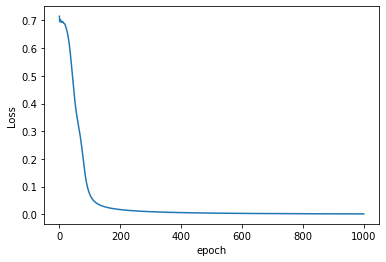

In [67]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [68]:
def plot_decision_boundary(X, y):
    x_span = np.linspace(min(X[:,0]) -0.25, max(X[:, 0])+0.25, 3)
    y_span = np.linspace(min(X[:, 1]) -0.25, max(X[:, 1])+0.25, 3)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).detach().numpy()
    plt.contourf(xx, yy, z)

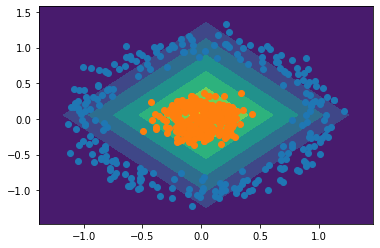

In [69]:
plot_decision_boundary(X, y)    
scatter_plot()

Prediction is 1


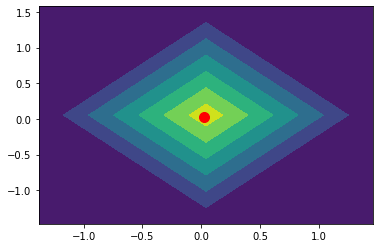

In [71]:
x = 0.025
y = 0.025
point = torch.Tensor([x, y])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='red')
print("Prediction is", prediction)
plot_decision_boundary(X, y)